<a href="https://colab.research.google.com/github/SivaKumarRajuPaidi/Spam_Classification/blob/main/Spam-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam Message Classification

### Data Preprocessing

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.tsv', sep="\t")

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
data.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

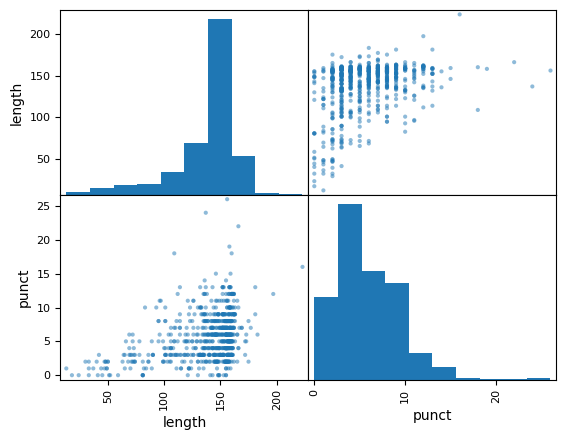

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[data.label=="spam"])
plt.show()

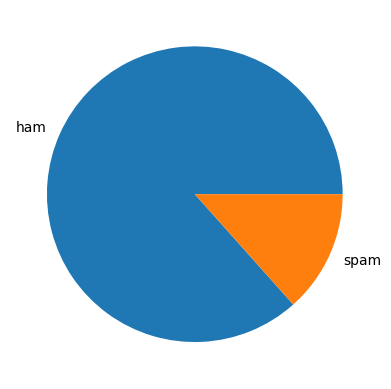

In [7]:
plt.pie(data.label.value_counts(), labels= data.label.unique().tolist())
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

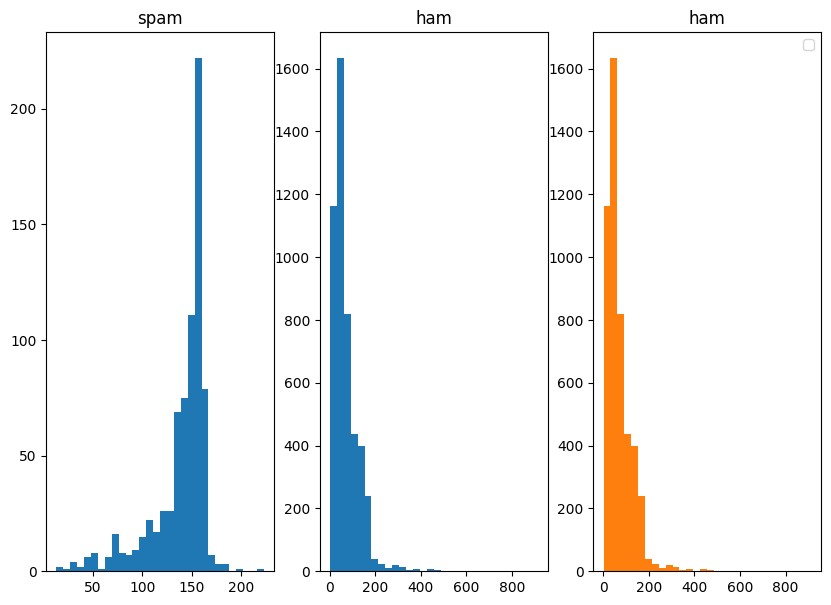

In [8]:
plt.figure(figsize=(10,7))
plt.subplot(131)
plt.hist(data[data.label=="spam"].length, bins=30)
plt.title("spam")

plt.subplot(132)
plt.hist(data[data.label=="ham"].length, bins=30)
plt.title("ham")
plt.plot()


plt.subplot(133)
plt.hist(data[data.label=="spam"].length, bins=30)
plt.hist(data[data.label=="ham"].length, bins=30)
plt.title("ham")
plt.legend()
plt.plot()

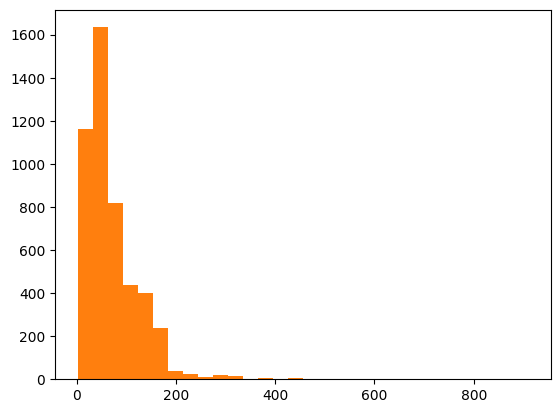

In [9]:
plt.hist(data[data.label=="spam"].length, bins=30)
plt.hist(data[data.label=="ham"].length, bins=30)
plt.show()

In [10]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data["message"],data["label"], test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900,), (1672,), (3900,), (1672,))

In [12]:
y_train.value_counts()*100/len(y_train)

label
ham     86.589744
spam    13.410256
Name: count, dtype: float64

In [13]:
y_test.value_counts()

label
ham     1448
spam     224
Name: count, dtype: int64

In [14]:
y_test.value_counts()*100/len(y_test)

label
ham     86.602871
spam    13.397129
Name: count, dtype: float64

## Build Model - RandomForest

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [16]:
from sklearn import metrics

In [17]:
classifier = Pipeline([("tfidf", TfidfVectorizer()),
         ("classifier", RandomForestClassifier(n_estimators=10))])

In [18]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### Prediction

In [21]:
classifier.score(X_test,y_test)

0.9736842105263158

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [25]:
type(y_test),type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

In [26]:
confusion_matrix= confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1448,    0],
       [  44,  180]])

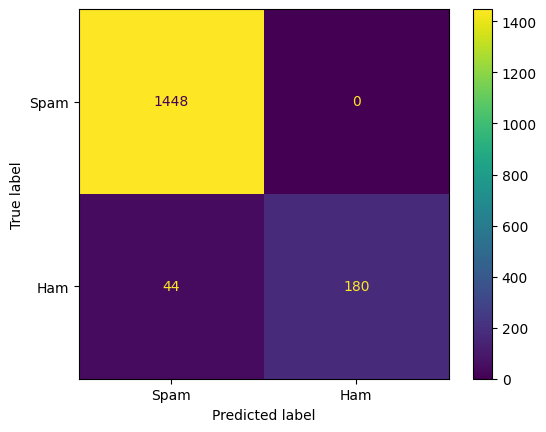

In [27]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Spam", "Ham"])
cm_display.plot()
plt.show()

In [28]:
c_report = classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1448
        spam       1.00      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



## Building Model - SVM

In [29]:
from sklearn.svm import SVC

In [54]:
svm = Pipeline([("tfidf", TfidfVectorizer()),
         ("classifier", SVC(gamma='scale'))])

In [55]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

### Prediction


In [56]:
y_pred = svm.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.986244019138756

In [58]:
type(y_test),type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

In [59]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1448,    0],
       [  23,  201]])

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
c_report = classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.90      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672

